In [46]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

prep data

In [52]:
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('WineQT.csv')
d=[df["alcohol"],df["quality"]]
x=[]

xinit=np.transpose(np.matrix(d))
y=[]
y_simpl=[]

for loop in range(len(xinit)):
    if loop%10==0:
        x.append([xinit[loop,0],xinit[loop,1]])
        #on considère comme bon un vin dont alcohol + qualité^2 > 11+5^2
        if(1.2*xinit[loop,0]+xinit[loop,1]*xinit[loop,1]>11+5*5 ):
            y_simpl.append(1)
        else:
            y_simpl.append(0)
        
        if(not ((1.2*xinit[loop,0]+xinit[loop,1]*xinit[loop,0]>40+5*5 
           and xinit[loop,0]<=12)
           and  xinit[loop,1]>5 )):
            y.append(1)
        else:
            y.append(0)

x=np.array(x)


In [48]:
def plot_data(X, y, ax, pos_label="y=1", neg_label="y=0", s=80, loc='best',idx=0,idy=1 ):
    """ plots logistic data with two axis """
    # Find Indices of Positive and Negative Examples
    pos=[]
    neg=[]
    idpos=[]
    idneg=[]
    for loop in range(len(y)):
        if(y[loop]==1):
            idpos.append(X[loop,idx])
            pos.append(X[loop,idy])
        else:
            idneg.append(X[loop,idx])
            neg.append(X[loop,idy])

    # Plot examples
    ax.scatter(idpos, pos, marker='x', s=s, c = 'red', label=pos_label)
    ax.scatter(idneg, neg, marker='o', s=s, label=neg_label, facecolors='none', edgecolors='blue', lw=3)
    ax.legend(loc=loc)

    ax.figure.canvas.toolbar_visible = False
    ax.figure.canvas.header_visible = False
    ax.figure.canvas.footer_visible = False

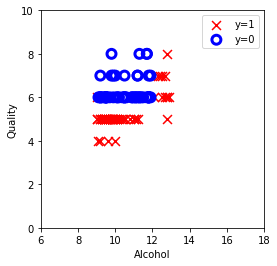

In [49]:
fig,ax = plt.subplots(1,1,figsize=(4,4))
plot_data(x, y, ax)

ax.axis([6, 18, 0, 10])
ax.set_ylabel('Quality')
ax.set_xlabel('Alcohol')

plt.show()

In [57]:
x=np.array(x)
y=np.array(y).reshape(-1,1)
print(x.shape, y.shape)

(115, 2) (115, 1)


NORMALIZE DATA

NO